# Extract gold standard from dataset 14-02-2023
## Load dataset

Dataset coming from `20230214-data_exploration_and_training.ipynb`

In [14]:
import pandas as pd


df = pd.read_csv("20230214-dataset_formatted_with_title_and_short_desription_combined.csv", index_col=0)
df.tail()

title_texte     85     44     50  \
15836  EU public diplomacy in Japan As part of the ap...  False  False  False   
15837  Cleaning service for the Delegation of the Eur...  False  False  False   
15838  Support to Microbiology-related Activities and...   True  False  False   
15839  Provision of benchmarked housing data and info...  False  False  False   
15840  ENI — Treatment and disposal of the remaining ...  False  False  False   

          80     73     45     71     79     90  ...     18     03     24  \
15836  False  False  False  False   True  False  ...  False  False  False   
15837  False  False  False  False  False   True  ...  False  False  False   
15838  False  False  False  False  False  False  ...  False  False  False   
15839  False  False  False  False  False  False  ...  False  False  False   
15840  False  False  False  False  False   True  ...  False  False  False   

          43     19     41     37     14     16     76  
15836  False  False  False  False  False  False  False  
15837  False  False  False  False  False  False  False  
15838  False  False  False  False  False  False  False  
15839  False  False  False  False  False  False  False  
15840  False  False  False  False  False  False  False  

[5 rows x 46 columns]

In [15]:
df.describe()

title_texte     85     44  \
count                                               15841  15841  15841   
unique                                              14802      2      2   
top     Consulting services for water-supply and waste...  False  False   
freq                                                  158  15505  15697   

           50     80     73     45     71     79     90  ...     18     03  \
count   15841  15841  15841  15841  15841  15841  15841  ...  15841  15841   
unique      2      2      2      2      2      2      2  ...      2      2   
top     False  False  False  False  False  False  False  ...  False  False   
freq    15455  15328  14505  14644  13436  12335  14986  ...  15801  15805   

           24     43     19     41     37     14     16     76  
count   15841  15841  15841  15841  15841  15841  15841  15841  
unique      2      2      2      2      2      2      2      2  
top     False  False  False  False  False  False  False  False  
freq    15795  15818  15829  15822  15824  15819  15832  15833  

[4 rows x 46 columns]

In [16]:
df = df.drop_duplicates(subset=['title_texte'], keep='last')

## Create random dataset with about 20 labels for each division

In [17]:
# Ordered list from less present labels to more present labels in docs

order_columns = ['76',
 '16',
 '19',
 '37',
 '41',
 '14',
 '43',
 '03',
 '18',
 '24',
 '15',
 '65',
 '70',
 '51',
 '22',
 '77',
 '44',
 '55',
 '98',
 '60',
 '09',
 '63',
 '64',
 '42',
 '35',
 '31',
 '92',
 '33',
 '32',
 '39',
 '48',
 '66',
 '34',
 '85',
 '30',
 '75',
 '38',
 '50',
 '80',
 '90',
 '72',
 '45',
 '73',
 '71',
 '79']

In [18]:
import matplotlib
import matplotlib.pyplot as plt

font = {'size': 22}
matplotlib.rc('font', **font)


def create_barplot_from_dict(dictionary, threshold=None):
    plt.figure(figsize=(24,10))
    plt.bar(dictionary.keys(), dictionary.values(), color='c', edgecolor='k', alpha=0.65)
    if threshold:
        plt.axhline(y=threshold,linewidth=2, color='r')
    plt.xticks(rotation=90)



def count_elements_in_dataframe_from_columns(df, list_column_names):
    found_aggregation = dict()
    for _, row in df.iterrows():
        for column_name in list_column_names:
            if row[column_name]:
                if column_name not in found_aggregation:
                    found_aggregation[column_name] = 1
                else:
                    found_aggregation[column_name] = found_aggregation[column_name] + 1

    return found_aggregation

In [19]:
division_columns = df.columns.to_list()
division_columns.remove("title_texte")
print(division_columns)

['85', '44', '50', '80', '73', '45', '71', '79', '90', '30', '35', '33', '55', '72', '48', '38', '09', '75', '66', '64', '42', '34', '60', '92', '39', '31', '98', '51', '32', '65', '77', '22', '63', '15', '70', '18', '03', '24', '43', '19', '41', '37', '14', '16', '76']


In [27]:
# Obtained from analysis of df
number_doc_per_div = {'79': 3424,
 '71': 2062,
 '73': 1326,
 '72': 1121,
 '45': 950,
 '90': 823,
 '80': 509,
 '50': 366,
 '38': 359,
 '75': 357,
 '30': 340,
 '85': 324,
 '66': 260,
 '34': 255,
 '48': 247,
 '39': 246,
 '32': 229,
 '92': 214,
 '33': 196,
 '64': 188,
 '42': 188,
 '35': 186,
 '31': 182,
 '63': 179,
 '09': 167,
 '60': 164,
 '98': 159,
 '55': 148,
 '44': 131,
 '77': 110,
 '22': 81,
 '51': 59,
 '70': 59,
 '15': 48,
 '65': 46,
 '24': 43,
 '18': 40,
 '03': 36,
 '14': 22,
 '43': 17,
 '37': 17,
 '41': 16,
 '19': 12,
 '16': 9,
 '76': 8}

In [28]:
all_columns = df.columns.to_list()
new_df = pd.DataFrame(columns=all_columns)
for col in division_columns:
    new_df[col] = new_df[col].astype(bool)

current_count = {division: 0 for division in order_columns}

for division in order_columns:
    count_div = current_count.get(division, 0)
    max_number_element_to_retrieve = max(0, 25-count_div)
    if max_number_element_to_retrieve > 0:
        if number_doc_per_div.get(division) <= 20:
            sub_df = df[df[division] == True]
        else:
            sub_df = df[df[division] == True].sample(n=max_number_element_to_retrieve, replace=True)
        new_df = pd.concat([new_df, sub_df])
        new_df = new_df.drop_duplicates(subset=['title_texte'], keep='first')
    current_count = count_elements_in_dataframe_from_columns(new_df, order_columns)




In [29]:
new_df.describe()

title_texte     85     44  \
count                                                 763    763    763   
unique                                                763      2      2   
top     Support to R&D strategy in the area of SET pla...  False  False   
freq                                                    1    738    737   

           50     80     73     45     71     79     90  ...     18     03  \
count     763    763    763    763    763    763    763  ...    763    763   
unique      2      2      2      2      2      2      2  ...      2      2   
top     False  False  False  False  False  False  False  ...  False  False   
freq      738    739    738    739    738    728    739  ...    742    744   

           24     43     19     41     37     14     16     76  
count     763    763    763    763    763    763    763    763  
unique      2      2      2      2      2      2      2      2  
top     False  False  False  False  False  False  False  False  
freq      742    745    751    748    746    748    754    755  

[4 rows x 46 columns]

In [30]:
new_df = new_df.drop_duplicates(subset=['title_texte'], keep='first')

In [31]:
new_df.describe()

title_texte     85     44  \
count                                                 763    763    763   
unique                                                763      2      2   
top     Support to R&D strategy in the area of SET pla...  False  False   
freq                                                    1    738    737   

           50     80     73     45     71     79     90  ...     18     03  \
count     763    763    763    763    763    763    763  ...    763    763   
unique      2      2      2      2      2      2      2  ...      2      2   
top     False  False  False  False  False  False  False  ...  False  False   
freq      738    739    738    739    738    728    739  ...    742    744   

           24     43     19     41     37     14     16     76  
count     763    763    763    763    763    763    763    763  
unique      2      2      2      2      2      2      2      2  
top     False  False  False  False  False  False  False  False  
freq      742    745    751    748    746    748    754    755  

[4 rows x 46 columns]

Text(0.5, 0, 'CPV division')

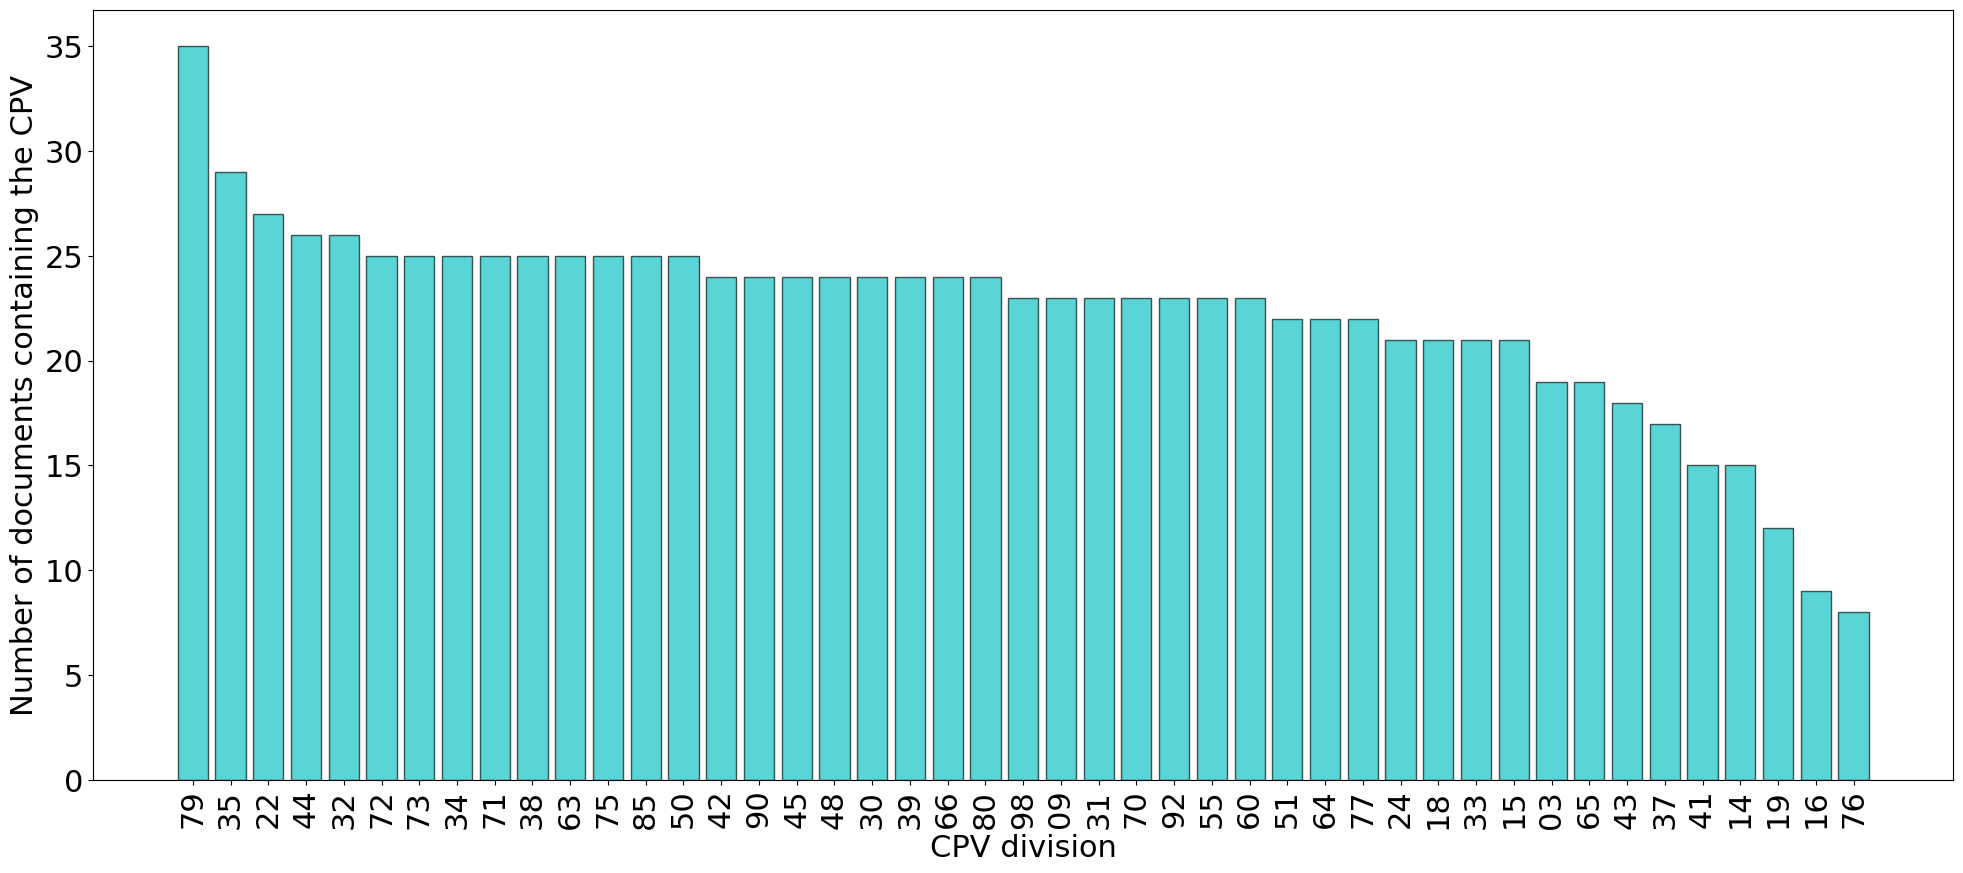

In [32]:
# Plot divisions vs number of documents containing the division
count_of_cpvs = count_elements_in_dataframe_from_columns(new_df, order_columns)
sorted_count_of_cpvs = dict(sorted(count_of_cpvs.items(), key=lambda x:x[1], reverse=True))
create_barplot_from_dict(sorted_count_of_cpvs)
plt.ylabel("Number of documents containing the CPV")
plt.xlabel("CPV division")


In [33]:
sorted_count_of_cpvs

{'79': 35,
 '35': 29,
 '22': 27,
 '44': 26,
 '32': 26,
 '72': 25,
 '73': 25,
 '34': 25,
 '71': 25,
 '38': 25,
 '63': 25,
 '75': 25,
 '85': 25,
 '50': 25,
 '42': 24,
 '90': 24,
 '45': 24,
 '48': 24,
 '30': 24,
 '39': 24,
 '66': 24,
 '80': 24,
 '98': 23,
 '09': 23,
 '31': 23,
 '70': 23,
 '92': 23,
 '55': 23,
 '60': 23,
 '51': 22,
 '64': 22,
 '77': 22,
 '24': 21,
 '18': 21,
 '33': 21,
 '15': 21,
 '03': 19,
 '65': 19,
 '43': 18,
 '37': 17,
 '41': 15,
 '14': 15,
 '19': 12,
 '16': 9,
 '76': 8}

In [34]:
new_df.to_csv("20230214_gold_standard_dataset.csv")